In [1]:
import pandas as pd
import numpy as np
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [4]:
data = pd.read_csv('/content/drive/Shareddrives/255Project/final_m_dia.csv')

In [5]:
data.head()

,HADMAM,HOWLONG,PROFEXAM,HAVARTH3,HTIN4,FRUITJU1,FLSHTMY2,LASTSIG3,USEEQUIP,QLACTLM2,CHCOCNCR,EDUCA,FLUSHOT5,CVDSTRK3,SSBCALRI,CNCRAGE,RRHCARE3,RSPSTATE,QLMENTL2,AVEDRNK2,HEIGHT3,CHCVISN1,HIVRISK3,HTM4,CTYCODE1,SHINGLE1,PCPSADEC,WEIGHT2,CHCKIDNY,SCNTMONY,RACE2,RMVTETH3,NRECSTR,WHRTST8,ADLTCHLD,SSBFRUT1,TNSARCV,ACEDEPRS,IMFVPLAC,CVDINFR4,CVDCRHD4,PAINACT2,RRCLASS2,SSBSUGR1,MAXDRNKS,SEQNO,PERSDOC2,NUMBURN2,O_STATE,NRECSEL,MISNERVS,DROCDY3_,WTKG3,AGE,MISTRHLP,CHECKUP1,PNEUVAC3,EMPLOY,GENHLTH,PDIABTST,DIABETE3
0,NaN,NaN,NaN,1.0,72.0,NaN,NaN,NaN,2.0,2.0,2.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,600.0,1.0,2.0,183.0,1.0,NaN,NaN,190.0,2.0,NaN,1.0,1.0,45328.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.012001e+09,1.0,NaN,1.0,2585.0,NaN,5.397605e-79,8618.0,64.0,NaN,1.0,1.0,7.0,3.0,1.0,3.0
1,NaN,NaN,NaN,2.0,66.0,NaN,102011.0,1.0,2.0,2.0,2.0,6.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,506.0,2.0,2.0,168.0,1.0,NaN,NaN,175.0,2.0,NaN,1.0,8.0,162814.0,NaN,5.397605e-79,NaN,NaN,NaN,8.0,2.0,2.0,NaN,NaN,NaN,2.0,2.012001e+09,1.0,NaN,1.0,3284.0,NaN,1.000000e+01,7938.0,54.0,NaN,1.0,2.0,1.0,1.0,1.0,3.0
2,NaN,NaN,NaN,1.0,73.0,NaN,NaN,NaN,2.0,2.0,2.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,601.0,2.0,2.0,185.0,1.0,NaN,NaN,250.0,2.0,NaN,1.0,1.0,162814.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,3.0,2.012001e+09,1.0,NaN,1.0,3284.0,NaN,1.400000e+01,11340.0,53.0,NaN,1.0,2.0,1.0,3.0,2.0,3.0
3,NaN,NaN,NaN,1.0,69.0,NaN,NaN,2.0,1.0,1.0,2.0,6.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0,509.0,2.0,2.0,175.0,1.0,NaN,NaN,210.0,2.0,NaN,1.0,8.0,162814.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,77.0,2.012001e+09,2.0,NaN,1.0,3284.0,NaN,8.300000e+01,9525.0,53.0,NaN,1.0,2.0,1.0,3.0,1.0,3.0
4,NaN,NaN,NaN,2.0,66.0,NaN,NaN,NaN,2.0,2.0,2.0,6.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,506.0,1.0,2.0,168.0,1.0,NaN,NaN,175.0,2.0,NaN,1.0,8.0,162814.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.012001e+09,1.0,NaN,1.0,3284.0,NaN,5.397605e-79,7938.0,55.0,NaN,3.0,2.0,1.0,2.0,1.0,3.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def gen_health(df_cv):
  df_cv['GENHLTH'].replace(2, 1, inplace=True)
  df_cv['GENHLTH'].replace(3, 1, inplace=True)
  df_cv['GENHLTH'].replace(4, 2, inplace=True)
  df_cv['GENHLTH'].replace(5, 2, inplace=True)
  df_cv['GENHLTH'].replace(7, np.NaN, inplace=True)
  df_cv['GENHLTH'].replace(9, np.NaN, inplace=True)
  df_cv['DIABETE3'].replace(4, 3, inplace=True)
  df_cv['DIABETE3'].replace(2, 1, inplace=True)
  df_cv['DIABETE3'].replace(7, np.nan, inplace=True)
  df_cv['DIABETE3'].replace(9, np.nan, inplace=True)
  df_cv['MAXDRNKS'].replace(77, np.nan, inplace=True)
  df_cv['MAXDRNKS'].replace(99, np.nan, inplace=True)
  

In [7]:
gen_health(data)

In [9]:
pred_set = data.loc[data.DIABETE3.isin([np.NaN])]
data = data.loc[-data.DIABETE3.isin([np.NaN])]
training_target = data['DIABETE3']
data.drop(['DIABETE3'],axis=1,inplace = True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, training_target,shuffle = True, test_size=0.2, random_state=42)

In [ ]:
def gridSearch_func(model,tree_parameters,score):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, tree_parameters, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

#XGB Algorithm

In [ ]:
# Parameter selection for maodel training

model = XGBClassifier()
#tree_parameters = {'learning_rate': [0.1, 0.2, 0.01],'max_depth': [3,5,6,8],'n_estimators': [10, 20, 50, 100, 200]}
tree_parameters = {'learning_rate': [0.8, 1 , 0.5],'max_depth': [5,6,10],'n_estimators': [70,100]}
scores = ['recall']

In [ ]:
# GridSearch for XGboost
# Best parameters set found on development set:{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
time_dict={}
start_time = time.time()
gridSearch_func(model,tree_parameters,scores[0])
end_time = time.time()
time_dict[f'XGBoost + gridSearchCV + {scores[0]}'] = end_time - start_time

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}

Grid scores on development set:

0.806 (+/-0.005) for {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 70}
0.804 (+/-0.005) for {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 100}
0.806 (+/-0.004) for {'learning_rate': 0.8, 'max_depth': 6, 'n_estimators': 70}
0.805 (+/-0.005) for {'learning_rate': 0.8, 'max_depth': 6, 'n_estimators': 100}
0.802 (+/-0.008) for {'learning_rate': 0.8, 'max_depth': 10, 'n_estimators': 70}
0.801 (+/-0.007) for {'learning_rate': 0.8, 'max_depth': 10, 'n_estimators': 100}
0.807 (+/-0.008) for {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 70}
0.807 (+/-0.007) for {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}
0.806 (+/-0.003) for {'learning_rate': 1, 'max_depth': 6, 'n_estimators': 70}
0.807 (+/-0.003) for {'learning_rate': 1, 'max_depth': 6, 'n_estimators': 100}
0.802 (+/-0.004) for {'l

In [11]:
# Re-train the model on the best hyper parameters

model = XGBClassifier(learning_rate= 1,max_depth= 5, n_estimators= 100)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

Accuracy on test data: 0.93
Accuracy on training data: 0.96


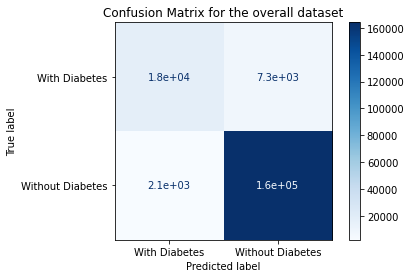

In [13]:
# Confusion matrix for the XGBoost model 
model.fit(X_train,y_train)
print("Accuracy on test data: {:.2f}".format(model.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model.score(X_train, y_train)))
disp = plot_confusion_matrix(model, data, training_target,display_labels=['With Diabetes',"Without Diabetes"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

# Random Forest

In [ ]:
# Other tree algorithms cannot work with Nan values .Converting them to a constant
training_set = data.fillna(0)

In [ ]:

# Best parameters set found on development set: {'bootstrap': True, 'max_depth': 10, 'max_features': 18, 'n_estimators': 150}
model = RandomForestClassifier()
tree_parameters = {'bootstrap': [True],'max_depth': [10,15,20],'n_estimators': [100,150]}
#tree_parameters ={}
scores = scores = ['recall']
X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)

In [ ]:
time_dict={}
start_time = time.time()
gridSearch_func(model,tree_parameters,scores[0])
end_time = time.time()
time_dict[f'RandomForestClassifier + gridSearchCV + {scores[0]}'] = end_time - start_time

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'bootstrap': True, 'max_depth': 20, 'n_estimators': 150}

Grid scores on development set:

0.611 (+/-0.013) for {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}
0.614 (+/-0.011) for {'bootstrap': True, 'max_depth': 10, 'n_estimators': 150}
0.678 (+/-0.010) for {'bootstrap': True, 'max_depth': 15, 'n_estimators': 100}
0.680 (+/-0.006) for {'bootstrap': True, 'max_depth': 15, 'n_estimators': 150}
0.705 (+/-0.007) for {'bootstrap': True, 'max_depth': 20, 'n_estimators': 100}
0.706 (+/-0.006) for {'bootstrap': True, 'max_depth': 20, 'n_estimators': 150}

Detailed classification report:

              precision    recall  f1-score   support

         1.0       0.81      0.44      0.57      4963
         3.0       0.92      0.98      0.95     33298

    accuracy                           0.91     38261
   macro avg       0.86      0.71      0.76     38261
weighted avg       0.91      0.91      0.90

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy on test data: 0.92
Accuracy on training data: 1.00


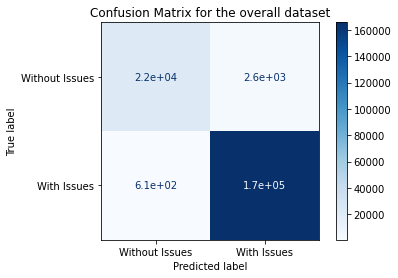

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
print(model.get_params())
print("Accuracy on test data: {:.2f}".format(model.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model.score(X_train, y_train)))
disp = plot_confusion_matrix(model, training_set, training_target,display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      4963
         3.0       0.87      1.00      0.93     33298

    accuracy                           0.87     38261
   macro avg       0.44      0.50      0.47     38261
weighted avg       0.76      0.87      0.81     38261



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Prediction using XGB

In [ ]:
import seaborn as sns

In [ ]:
model = XGBClassifier(learning_rate= 1,max_depth= 5, n_estimators= 100)
model.fit(data,training_target)
print(model.get_params())
print("Accuracy on test data: {:.2f}".format(model.score(data,training_target)))
pred_set.drop(labels=['DIABETE3'], axis=1, inplace=True)
y_pred = model.predict(pred_set)
predict = pd.DataFrame(data=y_pred, columns=["Predicted_random_forest"])

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
Accuracy on test data: 0.95


In [ ]:
predict.head()

,Predicted_random_forest
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


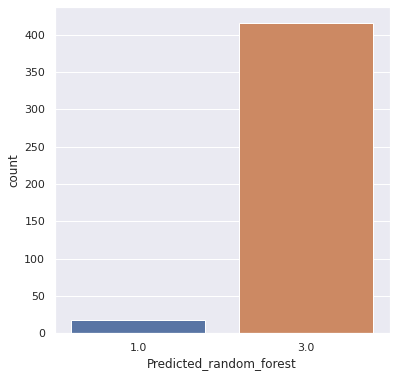

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(predict["Predicted_random_forest"],label="Count")